In [134]:
import os
import mplsoccer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
background = '#1E1E21'
text_col = 'white'
mpl.rcParams['font.family']= 'Calibri'
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['text.color'] = text_col
mpl.rcParams['xtick.color'] = text_col
mpl.rcParams['ytick.color'] = text_col
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17

In [135]:
import warnings
warnings.filterwarnings("ignore")

In [136]:
df = pd.read_csv('Shooting4.csv', index_col='Rk')

In [137]:
min_90s = 7
pos = ['FW','MF,FW','MF']

df = df[(df['90s']>=min_90s) & (df['Pos'].apply(lambda x: x in pos))]

In [138]:
df = df.drop_duplicates()

In [139]:
df['Shot_Quality'] = df['npxG']/df['Sh']
df['Finishing'] = df['np:G-xG']/df['Sh']

high_shotqual = df['Shot_Quality'].quantile(0.75)

In [140]:
outlier_top = df['Shot_Quality'].quantile(0.965)
outlier_bottom = df['Shot_Quality'].quantile(0.035)
outlier_right = df['Finishing'].quantile(0.965)
outlier_left = df['Finishing'].quantile(0.035)


Text(-0.3286157142857143, 0.23020000000000002, '75th Percentile Line')

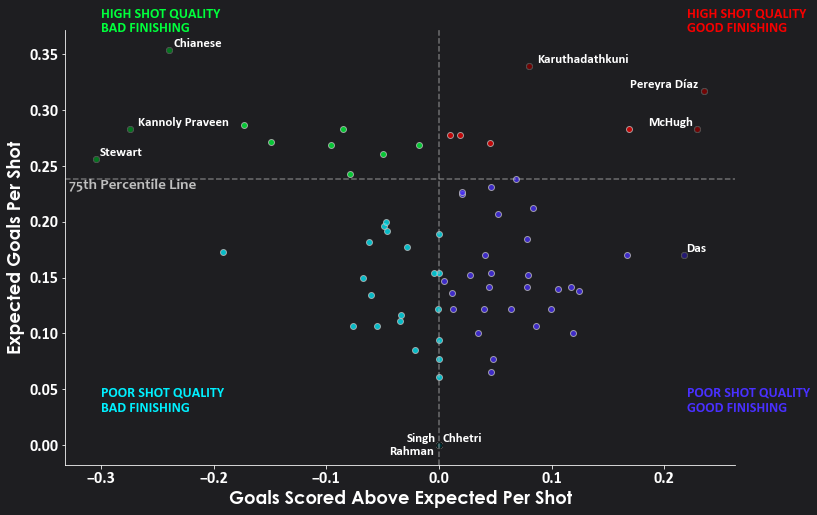

In [147]:
# SETUP
fig, ax = plt.subplots(figsize=(12,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)
ax.axhline(high_shotqual, ls='--', lw=1.5, c='#BFBFBF', alpha=0.5)
ax.axvline(0, ls='--', lw=1.5, c='#BFBFBF', alpha=0.5)
for s in ['left','bottom',]:
    ax.spines[s].set_color(text_col)
for s in ['top','right']:
    ax.spines[s].set_visible(False)
ec = '#C0C0C0'

# TOP RIGHT
color = '#F60000'
df_fil = df[(df['Shot_Quality']>high_shotqual) & (df['Finishing']>0)]
x, y = (df_fil['Finishing']).to_list(), (df_fil['Shot_Quality']).to_list()
ax.scatter(x, y, c=color, edgecolor=ec, alpha=0.75)
ax.text(0.22,0.37,'HIGH SHOT QUALITY\nGOOD FINISHING', c=color, size=14)

# TOP LEFT
color = '#00FF3C'
df_fil = df[(df['Shot_Quality']>high_shotqual) & (df['Finishing']<=0)]
x, y = (df_fil['Finishing']).to_list(), (df_fil['Shot_Quality']).to_list()
ax.scatter(x, y, c=color, edgecolor=ec, alpha=0.75)
ax.text(-0.3,0.37,'HIGH SHOT QUALITY\nBAD FINISHING', c=color, size=14)

# BOTTOM RIGHT
color = '#4930FF'
df_fil = df[(df['Shot_Quality']<=high_shotqual) & (df['Finishing']>0)]
x, y = (df_fil['Finishing']).to_list(), (df_fil['Shot_Quality']).to_list()
ax.scatter(x, y, c=color, edgecolor=ec, alpha=0.75)
ax.text(0.22,0.03,'POOR SHOT QUALITY\nGOOD FINISHING', c=color, size=14)

# BOTTOM LEFT
color = '#00F0FF'
df_fil = df[(df['Shot_Quality']<=high_shotqual) & (df['Finishing']<=0)]
x, y = (df_fil['Finishing']).to_list(), (df_fil['Shot_Quality']).to_list()
ax.scatter(x, y, c=color, edgecolor=ec, alpha=0.75)
ax.text(-0.3,0.03,'POOR SHOT QUALITY\nBAD FINISHING', c=color, size=14)

#TEXT
texts = []
for x, y, s in zip(df['Finishing'], df['Shot_Quality'], df['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    if x>outlier_right or x<outlier_left or y>outlier_top or y<outlier_bottom:
        ax.scatter(x, y, c='black', alpha = 0.4)
        texts.append(ax.text(x, y, name, fontdict=dict(color='white', size=13)))
        
adjust_text(texts,force_points=0.2, force_text=0.2,
             expand_points=(1.2, 1.2), expand_text=(1, 1),
             arrowprops=dict(arrowstyle = '-', lw=0.1, alpha = 0))


# LABELS
ax.set_xlabel('Goals Scored Above Expected Per Shot', size=18, family='Century Gothic', weight='heavy', 
             color=text_col)
ax.set_ylabel('Expected Goals Per Shot', size=18, family='Century Gothic', weight='heavy', 
             color=text_col)
ax.text(ax.get_xlim()[0]+0.003, high_shotqual-0.0078,
       '75th Percentile Line', color='#BFBFBF', family='Candara', size=15)